In [ ]:
import os
import cv2
import numpy as np

# Path to the main folder
main_folder_path = '/content/drive/MyDrive/Food_class/All'

# Initialize lists to hold image arrays and labels
all_images = []
all_labels = []

# Dictionary to hold the mapping of folder names to labels
folder_label_mapping = {}

# Loop through each subfolder
for label, subfolder in enumerate(sorted(os.listdir(main_folder_path)), start=1):
    subfolder_path = os.path.join(main_folder_path, subfolder)

    if os.path.isdir(subfolder_path):
        # Add the folder and its label to the dictionary
        folder_label_mapping[subfolder] = label

        # Loop through each image file in the subfolder
        for img_file in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path, img_file)

            # Read the image
            image = cv2.imread(img_path)
            if image is None:
                continue

            # Resize the image to 224x224 pixels
            image = cv2.resize(image, (224, 224))

            # Normalize the image (convert pixel values to the range 0 to 1)
            image = image.astype('float32') / 255.0

            # Append the processed image and its label to the lists
            all_images.append(image)
            all_labels.append(label)

# Convert the lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Display the shape of the arrays
print(f'Images array shape: {all_images.shape}')
print(f'Labels array shape: {all_labels.shape}')

# Print the folder to label mapping
print("\nFolder to label mapping:")
for folder, label in folder_label_mapping.items():
    print(f'Folder: {folder}, Label: {label}')


Images array shape: (960, 224, 224, 3)
Labels array shape: (960,)

Folder to label mapping:
Folder: Alur Dom, Label: 1
Folder: Basanti Polao, Label: 2
Folder: Chingrir Malaikari, Label: 3
Folder: Illish Mach Vaja, Label: 4
Folder: Luchi, Label: 5
Folder: Mishti Doi, Label: 6
Folder: Mutton Kosha, Label: 7
Folder: Rice, Label: 8


In [ ]:
all_images.shape,all_labels.shape

((960, 224, 224, 3), (960,))

In [ ]:
import pandas as pd

# Assuming all_images and all_labels are already created and populated as numpy arrays
# Convert the image arrays to a list of flattened arrays
flattened_images = [image.flatten() for image in all_images]

# Create a DataFrame
df = pd.DataFrame(flattened_images)

# Add the labels as a new column in the DataFrame
df['label'] = all_labels




In [ ]:
# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,label
0,0.592157,0.674510,0.800000,0.564706,0.647059,0.772549,0.564706,0.650980,0.772549,0.600000,...,0.054902,0.105882,0.192157,0.078431,0.129412,0.211765,0.133333,0.188235,0.262745,1
1,0.450980,0.615686,0.886275,0.447059,0.607843,0.878431,0.447059,0.592157,0.874510,0.443137,...,0.909804,0.929412,0.925490,0.933333,0.952941,0.949020,0.933333,0.952941,0.949020,1
2,0.450980,0.615686,0.886275,0.447059,0.607843,0.878431,0.447059,0.592157,0.874510,0.443137,...,0.909804,0.929412,0.925490,0.933333,0.952941,0.949020,0.933333,0.952941,0.949020,1
3,0.592157,0.674510,0.800000,0.564706,0.647059,0.772549,0.564706,0.650980,0.772549,0.600000,...,0.054902,0.105882,0.192157,0.078431,0.129412,0.211765,0.133333,0.188235,0.262745,1
4,0.184314,0.176471,0.223529,0.192157,0.192157,0.235294,0.207843,0.207843,0.254902,0.219608,...,0.364706,0.294118,0.227451,0.360784,0.278431,0.207843,0.384314,0.305882,0.235294,1


In [ ]:
224*224*3

150528

In [ ]:
# shuffle the dataset
from sklearn.utils import shuffle

# Shuffle the DataFrame
df = shuffle(df, random_state=42)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,label
0,0.917647,0.929412,0.960784,0.901961,0.913725,0.945098,0.898039,0.909804,0.941176,0.898039,...,0.784314,0.796078,0.827451,0.803922,0.815686,0.847059,0.815686,0.827451,0.858824,7
1,0.945098,0.964706,0.968627,0.894118,0.913725,0.917647,0.878431,0.898039,0.901961,0.886275,...,0.670588,0.784314,0.819608,0.701961,0.811765,0.850980,0.592157,0.698039,0.737255,4
2,0.964706,0.921569,0.929412,0.949020,0.905882,0.913725,0.945098,0.901961,0.909804,0.952941,...,0.729412,0.729412,0.729412,0.733333,0.733333,0.733333,0.741176,0.741176,0.741176,3
3,0.952941,0.945098,0.941176,0.933333,0.925490,0.921569,0.921569,0.913725,0.909804,0.925490,...,0.960784,0.941176,0.937255,0.964706,0.945098,0.941176,0.972549,0.952941,0.949020,8
4,0.007843,0.000000,0.000000,0.007843,0.000000,0.000000,0.007843,0.000000,0.000000,0.007843,...,0.031373,0.070588,0.070588,0.062745,0.101961,0.101961,0.101961,0.141176,0.141176,8


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd


In [ ]:
# Assuming df is your DataFrame
X = df.drop('label', axis=1).values
y = df['label'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [ ]:
# Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128, 0.8),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256, 0.8),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512, 0.8),
            nn.Linear(512, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 8)  # Output logits for 8 classes
        )

    def forward(self, x):
        return self.model(x)



In [ ]:
latent_dim = 100
generator = Generator(latent_dim, 150528)
discriminator = Discriminator(150528)

optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterion = nn.CrossEntropyLoss()


In [ ]:
print(f"Unique labels in y_train: {torch.unique(y_train)}")
print(f"Unique labels in y_test: {torch.unique(y_test)}")


Unique labels in y_train: tensor([1, 2, 3, 4, 5, 6, 7, 8])
Unique labels in y_test: tensor([1, 2, 3, 4, 5, 6, 7, 8])


In [ ]:
def adjust_labels(labels):
    return torch.clamp(labels, min=0, max=7)

# Adjust the labels
y_train = adjust_labels(y_train)
y_test = adjust_labels(y_test)

print(f"Unique labels in adjusted y_train: {torch.unique(y_train)}")
print(f"Unique labels in adjusted y_test: {torch.unique(y_test)}")


Unique labels in adjusted y_train: tensor([1, 2, 3, 4, 5, 6, 7])
Unique labels in adjusted y_test: tensor([1, 2, 3, 4, 5, 6, 7])


In [ ]:
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(X_train.size(0) // batch_size):
            # Train Discriminator
            idx = np.random.randint(0, X_train.size(0), batch_size)
            real_samples = X_train[idx]
            real_labels = y_train[idx]

            noise = torch.randn(batch_size, latent_dim)
            fake_samples = generator(noise)
            fake_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_D.zero_grad()
            real_preds = discriminator(real_samples)
            fake_preds = discriminator(fake_samples)

            real_loss = criterion(real_preds, real_labels)
            fake_loss = criterion(fake_preds, fake_labels)
            d_loss = 0.5 * (real_loss + fake_loss)
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            noise = torch.randn(batch_size, latent_dim)
            valid_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_G.zero_grad()
            g_loss = criterion(discriminator(generator(noise)), valid_labels)
            g_loss.backward()
            optimizer_G.step()

        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

# Training GAN with fewer epochs
train_gan(epochs=10, batch_size=32)


Epoch 1/10 [D loss: 1.440321922302246] [G loss: 2.0866024494171143]
Epoch 2/10 [D loss: 1.1163901090621948] [G loss: 2.0799920558929443]
Epoch 3/10 [D loss: 1.0606355667114258] [G loss: 2.0720670223236084]
Epoch 4/10 [D loss: 1.0534944534301758] [G loss: 2.066894054412842]
Epoch 5/10 [D loss: 1.0563033819198608] [G loss: 2.0879368782043457]
Epoch 6/10 [D loss: 1.0442684888839722] [G loss: 2.0898244380950928]
Epoch 7/10 [D loss: 1.0447641611099243] [G loss: 2.0695383548736572]
Epoch 8/10 [D loss: 1.0336902141571045] [G loss: 2.0726473331451416]
Epoch 9/10 [D loss: 1.043408989906311] [G loss: 2.0807957649230957]
Epoch 10/10 [D loss: 1.0499939918518066] [G loss: 2.102938175201416]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the discriminator on the test set
with torch.no_grad():
    y_pred = discriminator(X_test)
    y_pred_classes = torch.argmax(y_pred, dim=1).numpy()

# Calculate metrics
accuracy = accuracy_score(y_test.numpy(), y_pred_classes)
precision = precision_score(y_test.numpy(), y_pred_classes, average='weighted')
recall = recall_score(y_test.numpy(), y_pred_classes, average='weighted')
f1 = f1_score(y_test.numpy(), y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 94.79%
Precision: 95.30%
Recall: 94.79%
F1 Score: 94.69%


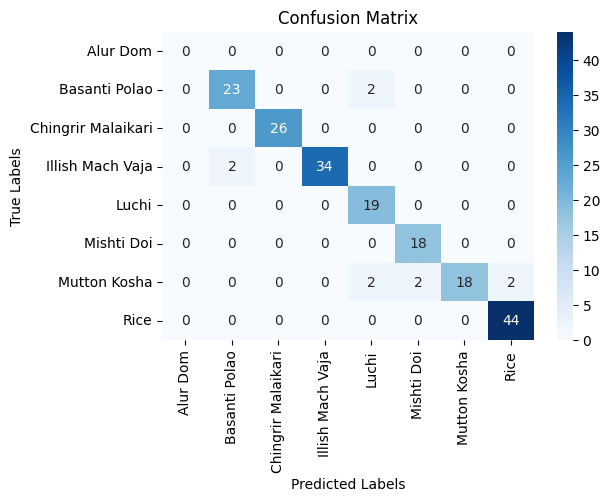

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class names
class_names = [
    'Alur Dom', 'Basanti Polao', 'Chingrir Malaikari', 'Illish Mach Vaja',
    'Luchi', 'Mishti Doi', 'Mutton Kosha', 'Rice'
]

# Assuming y_test and y_pred_classes are your true labels and predicted labels
y_test = y_test  # Convert to numpy if needed
y_pred_classes = y_pred_classes  # Already in numpy format

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes, labels=np.arange(len(class_names)))

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Assuming df is your DataFrame
X = df.drop('label', axis=1).values
y = df['label'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [ ]:
def adjust_labels(labels):
    return torch.clamp(labels, min=0, max=7)

# Adjust the labels
y_train = adjust_labels(y_train)
y_test = adjust_labels(y_test)

print(f"Unique labels in adjusted y_train: {torch.unique(y_train)}")
print(f"Unique labels in adjusted y_test: {torch.unique(y_test)}")


Unique labels in adjusted y_train: tensor([1, 2, 3, 4, 5, 6, 7])
Unique labels in adjusted y_test: tensor([1, 2, 3, 4, 5, 6, 7])


In [ ]:
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(X_train.size(0) // batch_size):
            # Train Discriminator
            idx = np.random.randint(0, X_train.size(0), batch_size)
            real_samples = X_train[idx]
            real_labels = y_train[idx]

            noise = torch.randn(batch_size, latent_dim)
            fake_samples = generator(noise)
            fake_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_D.zero_grad()
            real_preds = discriminator(real_samples)
            fake_preds = discriminator(fake_samples)

            real_loss = criterion(real_preds, real_labels)
            fake_loss = criterion(fake_preds, fake_labels)
            d_loss = 0.5 * (real_loss + fake_loss)
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            noise = torch.randn(batch_size, latent_dim)
            valid_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_G.zero_grad()
            g_loss = criterion(discriminator(generator(noise)), valid_labels)
            g_loss.backward()
            optimizer_G.step()

        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

# Training GAN with fewer epochs
train_gan(epochs=10, batch_size=32)


Epoch 1/10 [D loss: 1.4187214374542236] [G loss: 2.087374210357666]
Epoch 2/10 [D loss: 1.274884581565857] [G loss: 2.0830044746398926]
Epoch 3/10 [D loss: 1.279826283454895] [G loss: 2.067329168319702]
Epoch 4/10 [D loss: 1.20260488986969] [G loss: 2.0719680786132812]
Epoch 5/10 [D loss: 1.0605658292770386] [G loss: 2.082951068878174]
Epoch 6/10 [D loss: 1.1178621053695679] [G loss: 2.0954418182373047]
Epoch 7/10 [D loss: 1.0421350002288818] [G loss: 2.088756799697876]
Epoch 8/10 [D loss: 1.1605228185653687] [G loss: 2.0914947986602783]
Epoch 9/10 [D loss: 1.142544150352478] [G loss: 2.0762100219726562]
Epoch 10/10 [D loss: 1.049065113067627] [G loss: 2.081733465194702]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the discriminator on the test set
with torch.no_grad():
    y_pred = discriminator(X_test)
    y_pred_classes = torch.argmax(y_pred, dim=1).numpy()

# Calculate metrics
accuracy = accuracy_score(y_test.numpy(), y_pred_classes)
precision = precision_score(y_test.numpy(), y_pred_classes, average='weighted')
recall = recall_score(y_test.numpy(), y_pred_classes, average='weighted')
f1 = f1_score(y_test.numpy(), y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 80.73%
Precision: 81.54%
Recall: 80.73%
F1 Score: 80.43%


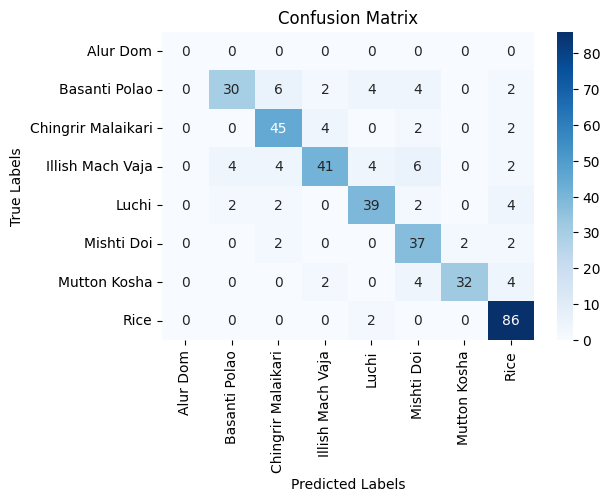

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class names
class_names = [
    'Alur Dom', 'Basanti Polao', 'Chingrir Malaikari', 'Illish Mach Vaja',
    'Luchi', 'Mishti Doi', 'Mutton Kosha', 'Rice'
]

# Assuming y_test and y_pred_classes are your true labels and predicted labels
y_test = y_test  # Convert to numpy if needed
y_pred_classes = y_pred_classes  # Already in numpy format

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes, labels=np.arange(len(class_names)))

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Assuming df is your DataFrame
X = df.drop('label', axis=1).values
y = df['label'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [ ]:
def adjust_labels(labels):
    return torch.clamp(labels, min=0, max=7)

# Adjust the labels
y_train = adjust_labels(y_train)
y_test = adjust_labels(y_test)

print(f"Unique labels in adjusted y_train: {torch.unique(y_train)}")
print(f"Unique labels in adjusted y_test: {torch.unique(y_test)}")


Unique labels in adjusted y_train: tensor([1, 2, 3, 4, 5, 6, 7])
Unique labels in adjusted y_test: tensor([1, 2, 3, 4, 5, 6, 7])


In [ ]:
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(X_train.size(0) // batch_size):
            # Train Discriminator
            idx = np.random.randint(0, X_train.size(0), batch_size)
            real_samples = X_train[idx]
            real_labels = y_train[idx]

            noise = torch.randn(batch_size, latent_dim)
            fake_samples = generator(noise)
            fake_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_D.zero_grad()
            real_preds = discriminator(real_samples)
            fake_preds = discriminator(fake_samples)

            real_loss = criterion(real_preds, real_labels)
            fake_loss = criterion(fake_preds, fake_labels)
            d_loss = 0.5 * (real_loss + fake_loss)
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            noise = torch.randn(batch_size, latent_dim)
            valid_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_G.zero_grad()
            g_loss = criterion(discriminator(generator(noise)), valid_labels)
            g_loss.backward()
            optimizer_G.step()

        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

# Training GAN with fewer epochs
train_gan(epochs=10, batch_size=32)


Epoch 1/10 [D loss: 4.165539741516113] [G loss: 2.049140214920044]
Epoch 2/10 [D loss: 1.1583216190338135] [G loss: 2.067082405090332]
Epoch 3/10 [D loss: 1.127173662185669] [G loss: 2.0845000743865967]
Epoch 4/10 [D loss: 1.0468288660049438] [G loss: 2.0962698459625244]
Epoch 5/10 [D loss: 1.1399680376052856] [G loss: 2.0942914485931396]
Epoch 6/10 [D loss: 1.0329443216323853] [G loss: 2.0745112895965576]
Epoch 7/10 [D loss: 1.0430747270584106] [G loss: 2.0967299938201904]
Epoch 8/10 [D loss: 1.0394614934921265] [G loss: 2.059974193572998]
Epoch 9/10 [D loss: 1.0448096990585327] [G loss: 2.0699522495269775]
Epoch 10/10 [D loss: 1.0379060506820679] [G loss: 2.0926427841186523]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the discriminator on the test set
with torch.no_grad():
    y_pred = discriminator(X_test)
    y_pred_classes = torch.argmax(y_pred, dim=1).numpy()

# Calculate metrics
accuracy = accuracy_score(y_test.numpy(), y_pred_classes)
precision = precision_score(y_test.numpy(), y_pred_classes, average='weighted')
recall = recall_score(y_test.numpy(), y_pred_classes, average='weighted')
f1 = f1_score(y_test.numpy(), y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 86.11%
Precision: 86.63%
Recall: 86.11%
F1 Score: 85.98%


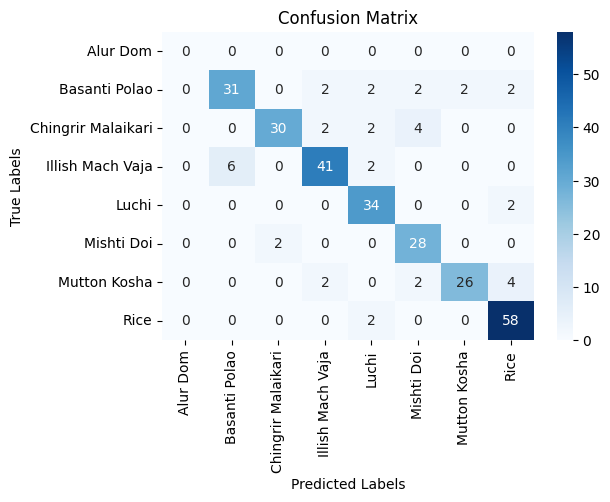

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class names
class_names = [
    'Alur Dom', 'Basanti Polao', 'Chingrir Malaikari', 'Illish Mach Vaja',
    'Luchi', 'Mishti Doi', 'Mutton Kosha', 'Rice'
]

# Assuming y_test and y_pred_classes are your true labels and predicted labels
y_test = y_test  # Convert to numpy if needed
y_pred_classes = y_pred_classes  # Already in numpy format

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes, labels=np.arange(len(class_names)))

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Assuming df is your DataFrame
X = df.drop('label', axis=1).values
y = df['label'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [ ]:
def adjust_labels(labels):
    return torch.clamp(labels, min=0, max=7)

# Adjust the labels
y_train = adjust_labels(y_train)
y_test = adjust_labels(y_test)

print(f"Unique labels in adjusted y_train: {torch.unique(y_train)}")
print(f"Unique labels in adjusted y_test: {torch.unique(y_test)}")


Unique labels in adjusted y_train: tensor([1, 2, 3, 4, 5, 6, 7])
Unique labels in adjusted y_test: tensor([1, 2, 3, 4, 5, 6, 7])


In [ ]:
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(X_train.size(0) // batch_size):
            # Train Discriminator
            idx = np.random.randint(0, X_train.size(0), batch_size)
            real_samples = X_train[idx]
            real_labels = y_train[idx]

            noise = torch.randn(batch_size, latent_dim)
            fake_samples = generator(noise)
            fake_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_D.zero_grad()
            real_preds = discriminator(real_samples)
            fake_preds = discriminator(fake_samples)

            real_loss = criterion(real_preds, real_labels)
            fake_loss = criterion(fake_preds, fake_labels)
            d_loss = 0.5 * (real_loss + fake_loss)
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            noise = torch.randn(batch_size, latent_dim)
            valid_labels = torch.randint(0, 8, (batch_size,))  # Ensure range is [0, 7]

            optimizer_G.zero_grad()
            g_loss = criterion(discriminator(generator(noise)), valid_labels)
            g_loss.backward()
            optimizer_G.step()

        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

# Training GAN with fewer epochs
train_gan(epochs=10, batch_size=32)


Epoch 1/10 [D loss: 1.0731892585754395] [G loss: 2.084721803665161]
Epoch 2/10 [D loss: 1.0667461156845093] [G loss: 2.0927071571350098]
Epoch 3/10 [D loss: 1.0470480918884277] [G loss: 2.1030514240264893]
Epoch 4/10 [D loss: 1.0364445447921753] [G loss: 2.065124988555908]
Epoch 5/10 [D loss: 1.0440614223480225] [G loss: 2.082902193069458]
Epoch 6/10 [D loss: 1.036786437034607] [G loss: 2.075645685195923]
Epoch 7/10 [D loss: 1.0377336740493774] [G loss: 2.0756046772003174]
Epoch 8/10 [D loss: 1.028920292854309] [G loss: 2.0773651599884033]
Epoch 9/10 [D loss: 1.0313197374343872] [G loss: 2.0573813915252686]
Epoch 10/10 [D loss: 1.0493324995040894] [G loss: 2.0776286125183105]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the discriminator on the test set
with torch.no_grad():
    y_pred = discriminator(X_test)
    y_pred_classes = torch.argmax(y_pred, dim=1).numpy()

# Calculate metrics
accuracy = accuracy_score(y_test.numpy(), y_pred_classes)
precision = precision_score(y_test.numpy(), y_pred_classes, average='weighted')
recall = recall_score(y_test.numpy(), y_pred_classes, average='weighted')
f1 = f1_score(y_test.numpy(), y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


Accuracy: 93.75%
Precision: 94.21%
Recall: 93.75%
F1 Score: 93.81%


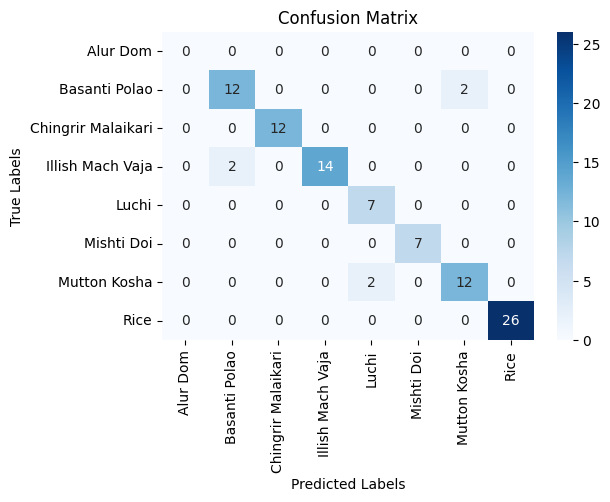

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Define class names
class_names = [
    'Alur Dom', 'Basanti Polao', 'Chingrir Malaikari', 'Illish Mach Vaja',
    'Luchi', 'Mishti Doi', 'Mutton Kosha', 'Rice'
]

# Assuming y_test and y_pred_classes are your true labels and predicted labels
y_test = y_test  # Convert to numpy if needed
y_pred_classes = y_pred_classes  # Already in numpy format

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes, labels=np.arange(len(class_names)))

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
